<a href="https://colab.research.google.com/github/coyens/machine_learning/blob/main/Apartament_Price/Apartament_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import os

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
np.random.seed(42)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pierwszy_projekt"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import os
import tarfile 
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("zestawy danych", "mieszkania")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Po wywołaniu funkcji zostanie utworzony katalog "zestawy danych/mieszkania" w przestrzeni roboczej. Pobrane i
# wypakowane zostanie archiwum "housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join (housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


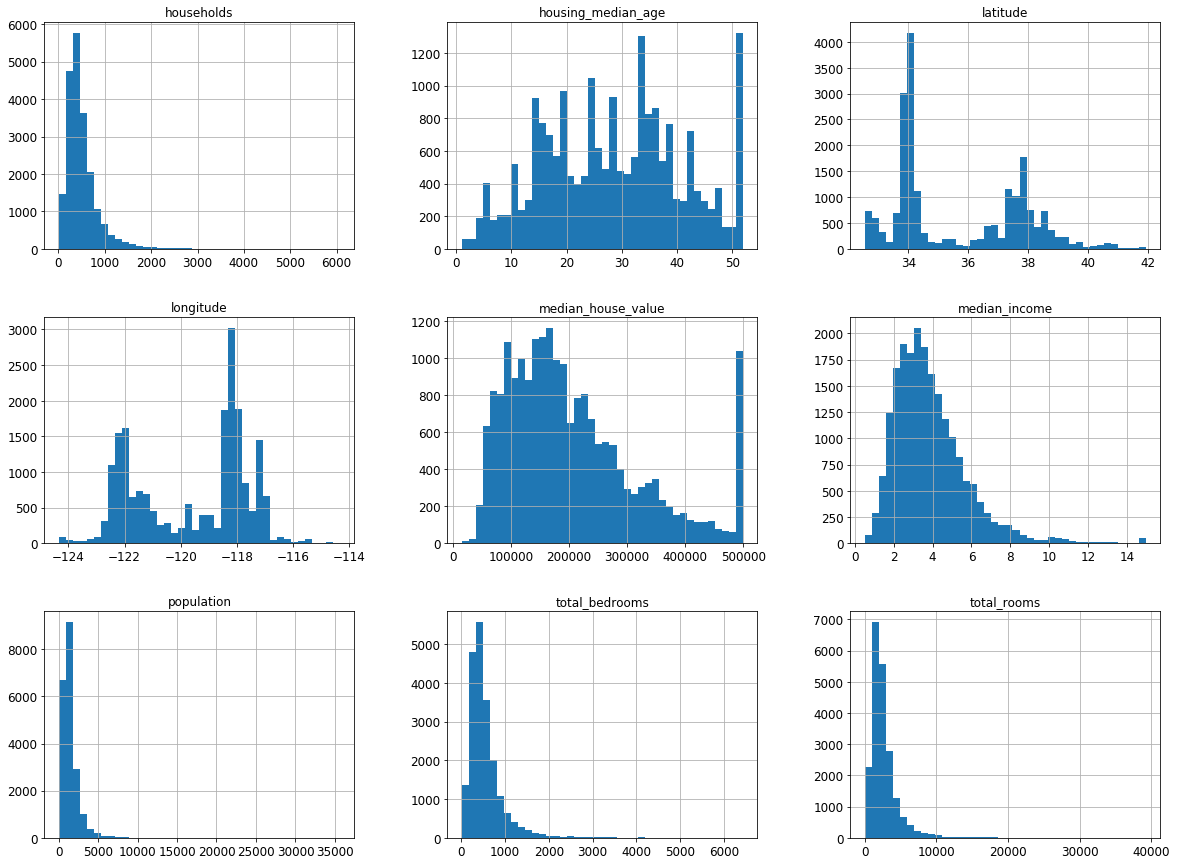

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins= 40, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(housing))
    test_set_size =int(len(data) + test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[:test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

housing_with_id = housing.reset.index() # dodaje kolumne z indexem, potrzebne by przy odświeżaniu zawsze był ten sam podział na
#dane trenowane i testowe
train_set, test_set = split_train_test(housing, 0.2)
print("Train data: ", len(train_set), ", Test data: ", len(test_set))

AttributeError: 'DataFrame' object has no attribute 'reset'

In [ ]:
print(split_train_test)

In [ ]:
# dzięki wbudowanej już funkcji można w ten sposób rozdzielić dane
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:

# mediana dochodu jest tutaj bardzo ważnym czynnikiem, dlatego  utworzone zostaną kategorie
# Ważne jest by by każda warstwa zestawów danych zawierała wystarczjącą liczbę przykładów. Nie należy tworzyć wielu warstw, ale
    # każda z warstw powinna być odpowiednio duża
# mediana została podzielonaprzez 1.5 ("cail"- zaokrąglenie) następnie nastąpiło scalenie kategorii o wartości > 5 w osobną kategorie

housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [ ]:
#Próbkowanie warstwowe na podstawie kategorii przychodów
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state=42)
for train_index, test_index, in split.split (housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
housing["income_cat"].value_counts()/ len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [ ]:
# Sprawdzenie różnych metod próbkowania

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(housing),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

print(compare_props)

     L. warstwowe    Losowe   Łącznie  Błąd - losowe (%)  \
1.0      0.039729  0.040213  0.039826           0.973236   
2.0      0.318798  0.324370  0.318847           1.732260   
3.0      0.350533  0.358527  0.350581           2.266446   
4.0      0.176357  0.167393  0.176308          -5.056334   
5.0      0.114583  0.109496  0.114438          -4.318374   

     Błąd - l. warstwowe (%)  
1.0                -0.243309  
2.0                -0.015195  
3.0                -0.013820  
4.0                 0.027480  
5.0                 0.127011  


In [ ]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0      

In [ ]:
# Należy usunąć dane "income_cat" i przywrócić zestaw do pierwotnego stanu

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
#Warto robić kopię danych trainingowych
housing=strat_train_set.copy()

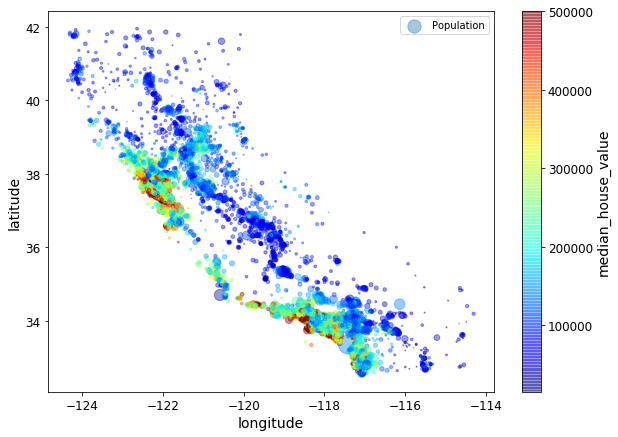

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha =0.4,
            s=housing["population"]/100, label = "Population", figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar = True)
plt.legend()

In [ ]:
corr_matrix=housing.corr() # współczynnik korelacj Pearsona
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000111C3C50>,
      dtype=object)

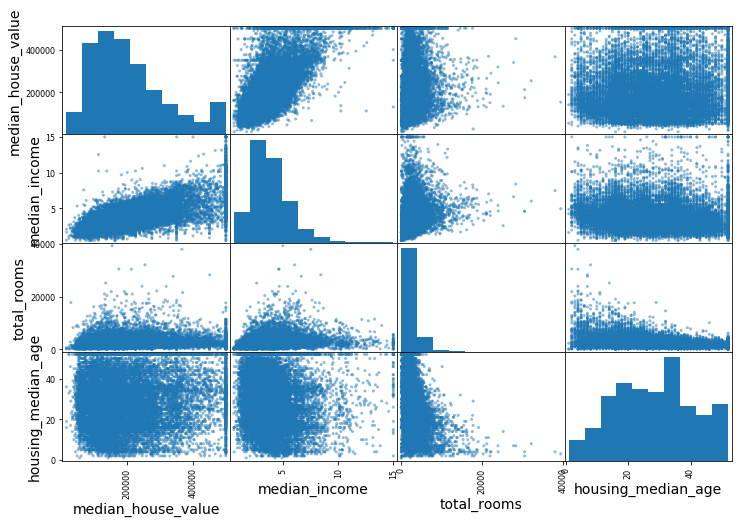

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize =(12,8))

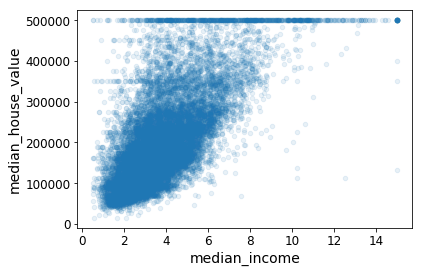

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
#Na wykresie widzimy silną korelację pomiędzy atrybutami, można tutaj zobaczyć tendencje wzrostową.  
#Po za tym widać tutaj ograniczenie ceny na poziomie 500 000, oraz poziome linie w granicy 350 000, 450 000 i 280 000
#Warto spróbować usunąć te dystynkty by uniemożliwić algorytmom uczenia się takich anomalii.

In [ ]:
#Tworzenie dodatkowych atrybutów na podstawie danych
housing["rooms_per_family"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["populations_per_family"]=housing["population"]/housing["households"]


In [ ]:
corr_matrix =housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.687160
rooms_per_family          0.146285
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
populations_per_family   -0.021985
population               -0.026920
longitude                -0.047432
latitude                 -0.142724
bedrooms_per_rooms       -0.259984
Name: median_house_value, dtype: float64

Przygotowanie danych pod algorytm uczenia maszynowego

In [ ]:
#Stworzenie kopii zestawu uczącego
housing =strat_train_set.drop("median_house_value", axis = 1)
housing_label = strat_train_set["median_house_value"].copy()

Oczyszczenie danych

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
#Mediana może byc wyliczona tylko z danych numeryczny, więc tworze zbiór z wyłączeniem danych opisowych "ocean_prozimity".
housing_num= housing.drop("ocean_proximity", axis =1)

imputer.fit(housing_num)


array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
# Można teraz użyć 'wyuczonej' klasy imputer do przekształcenia całego zbioru danych numerycznych w celu zastąpienia pustych 
# wartości oblicozna medianą 

X= imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns= housing_num.columns) #Tablica Numpy z przekształconymi cechami,  w obiekcie DataFrame

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Większośc algorytmów "woli" pracować na danych numerycznych, dlatego warto przekształcić etykiety na liczby

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [ ]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
from sklearn.preprocessing import OneHotEncoder


#Jako że dwie zbliżone wartości algorytm będzie interpretował że są do siebie bardziej podobne dobry rozwiązaniem jest zrobie 
# atrybutu binarnego dla każdej kategorii. To kodowanie nazywa się gorącojedynkowe (tylko atrybut z '1' będzie gorący). 
# Dla przykładu macierz, która oznaczać będzie "INLAND" będzie wyglądać tak: [0,1,0,0,0]


encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

#Funkcja reshape() umożliwia wprowadznie jednego wymiaru o wartości -1, oznacza to że nie jest on sprecyzowany,
# wartość ta jest wywanioskowana z długości macierzy oraz pozostałch wymiarów,

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
#Klasa OneHotEncoder zwraca domyślnie macierz rzadką, ale w razie potrzeby możemy ją przekształcić do postaci gęstej:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])